<a href="https://colab.research.google.com/github/Muskan520/Stock-prediction-models/blob/main/LSTM_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predicting adjusting stock price using lstm

In [ ]:
import math
import numpy as np
import pandas_datareader as web 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get data HP
df=web.DataReader('HP',data_source='yahoo', start='2011-01-01',end='2021-06-07')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,49.459999,48.849998,49.099998,49.040001,1024000.0,32.691223
2011-01-04,49.490002,47.759998,49.290001,48.110001,822900.0,32.071285
2011-01-05,49.570000,47.529999,47.779999,49.220001,1265400.0,32.811230
2011-01-06,49.330002,47.700001,49.259998,48.410000,1535500.0,32.271263
2011-01-07,49.000000,48.180000,48.419998,48.889999,1165400.0,32.591248
...,...,...,...,...,...,...
2021-06-01,30.059999,28.969999,29.049999,30.059999,1735900.0,30.059999
2021-06-02,32.700001,30.070000,30.370001,32.349998,2201900.0,32.349998
2021-06-03,33.099998,31.700001,32.349998,33.029999,2164500.0,33.029999


In [ ]:
df.shape

(2624, 6)

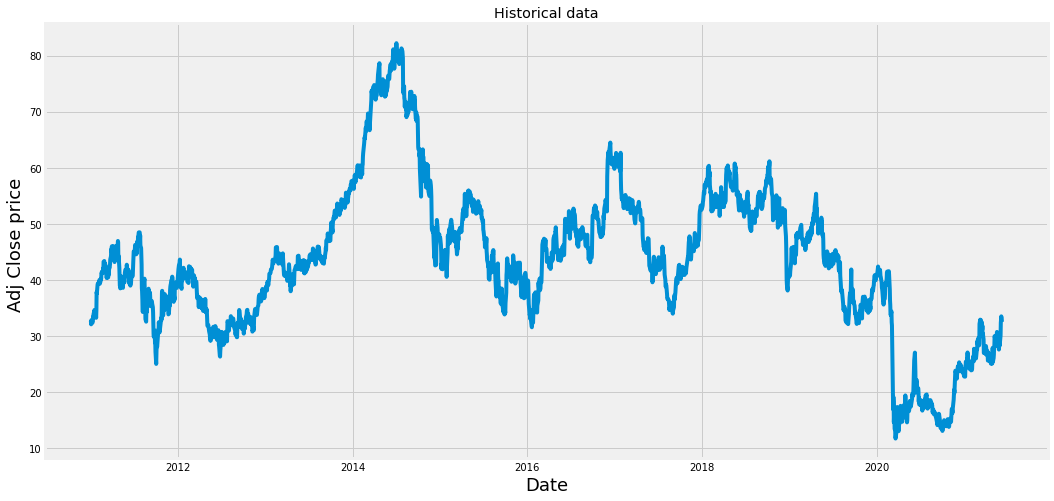

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Historical data')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price ',fontsize=18)
plt.show()


In [ ]:
data=df.filter(['Adj Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2100

In [ ]:
#scale the data
scaler= MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.29770165],
       [0.28891199],
       [0.29940313],
       ...,
       [0.3025049 ],
       [0.30902695],
       [0.29499043]])

In [ ]:
#creatitg training data set
#creating scaled training data set
train_data= scaled_data[0:training_data_len,:]
#split in x train and y train
x_train=[]
y_train=[]
 
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.29770165, 0.28891199, 0.29940313, 0.29174734, 0.29628416,
       0.29316498, 0.29590594, 0.30762602, 0.30412883, 0.3139586 ,
       0.32520592, 0.31660497, 0.31263523, 0.31272977, 0.31216268,
       0.3053576 , 0.32388271, 0.37047917, 0.36698193, 0.38928758,
       0.39165043, 0.39240649, 0.39344629, 0.39278461, 0.39751046,
       0.40129112, 0.3913668 , 0.39656526, 0.39467301, 0.40328278,
       0.40337726, 0.41728522, 0.41681224, 0.42220498, 0.41842054,
       0.43053068, 0.42012337, 0.44708792, 0.44907455, 0.43251752,
       0.43715349, 0.44283023, 0.44027565, 0.43336905, 0.43232833,
       0.4244755 , 0.4060265 , 0.41747436, 0.41993424, 0.41955596,
       0.40725641, 0.43223363, 0.41302775, 0.43327435, 0.43232833,
       0.4372483 , 0.44046495, 0.45323754, 0.46099539, 0.47802562])]
[0.47367333215597474]

[array([0.29770165, 0.28891199, 0.29940313, 0.29174734, 0.29628416,
       0.29316498, 0.29590594, 0.30762602, 0.30412883, 0.3139586 ,
       0.32520592, 0.31660497, 0.31

In [ ]:
#convert x_train & y_train to numpy
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2040, 60, 1)

In [ ]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2040/2040 [==============================] - 68s 24ms/step - loss: 0.0056


In [ ]:
#Create the testing data set
#Create a new array contaiing scaled values from index 2040 to 2624
test_data=scaled_data[training_data_len-60:,:]
#create the x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]    #want our model to predict
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])   #past 60 values

In [ ]:
#convert data to numpy array
x_test=np.array(x_test)


In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#x_test

In [ ]:
#get the models preddicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.2847083106362724

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


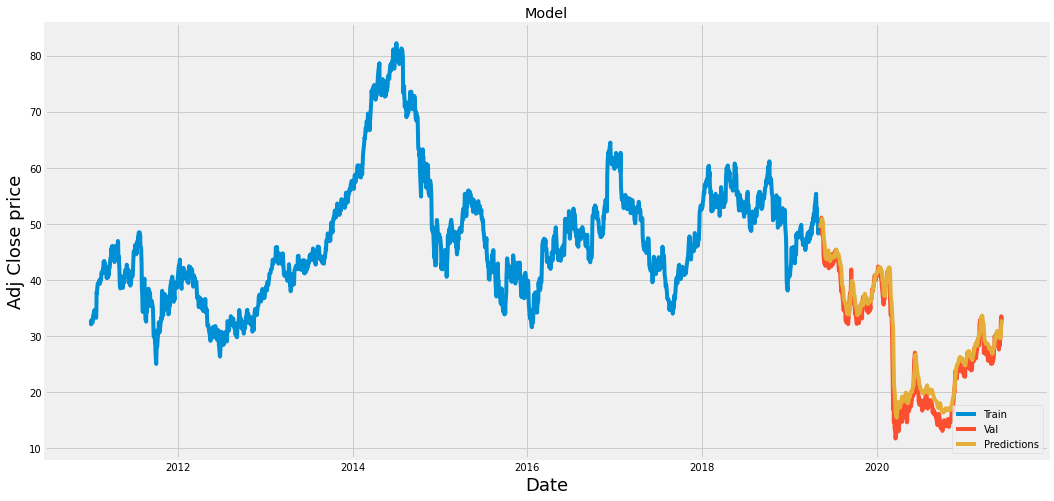

In [ ]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visu;aize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price',fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [ ]:
#Show the valid and predicted prices
valid


,Adj Close,Predictions
Date,,
2019-05-09,50.154713,49.271393
2019-05-10,49.928833,49.619884
2019-05-13,49.416256,49.951553
2019-05-14,51.101688,50.090065
2019-05-15,50.328472,50.517105
...,...,...
2021-06-01,30.059999,29.601782
2021-06-02,32.349998,29.938478
2021-06-03,33.029999,30.813683


In [ ]:
#Get the quote
vy_quote=web.DataReader('HP',data_source='yahoo', start='2011-01-01',end='2021-06-07')
#create a new data frame
new_df=vy_quote.filter(['Adj Close'])
#Get the last 60 days closing price values and convert the data frame to array
last_60_days=new_df[-60:].values
#Scale the data
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert X_test to numpy array
X_test=np.array(X_test)
#Reshape to 3 dim
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled prixes
pred_price=model.predict(X_test)
#Undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[33.538612]]


In [ ]:
#Get the Actual data
vy_quote2=web.DataReader('HP',data_source='yahoo', start='2021-06-08',end='2021-06-08')
print(vy_quote2['Adj Close'])


Date
2021-06-08    32.889999
Name: Adj Close, dtype: float64
